# Translation and repetition task: Llama thinks in English

In this task, we demonstrate that Llama thinks in English. We investigate the intermediate output layers using the tuned lens to analyze the model's reasoning. Our findings show that the language is processed in English, while the translation appears at both the first and last layers

### **Translation Task Prompt:**

In this task, the model is given four French words with their correct Chinese translations. The model will predict the Chinese translation for the fifth French word.

**Example Prompt:**

Français: "vertu" - 中文: "德"  
Français: "siège" - 中文: "座"  
Français: "neige" - 中文: "雪"  
Français: "montagne" - 中文: "山"  
Français: "fleur" - 中文:

---

### **Repetition Task Prompt:**

In this task, we ask the model to simply repeat the last Chinese word instead of translating it. This tests the model's ability to follow instructions without performing a translation.

**Example Prompt:**

中文: "德" - 中文: "德"  
中文: "座" - 中文: "座"  
中文: "雪" - 中文: "雪"  
中文: "山" - 中文: "山"  
中文: "花" - 中文:


In [1]:
!pip install tuned_lens

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.

In [4]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `llm` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `llm`


In [2]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 8.4 MB/s eta 0:00:00


## Load models

In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

# Use 4-bit quantization to reduce RAM usage
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Use 4-bit precision
    bnb_4bit_compute_dtype="float16",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

# Load model with quantization
model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Meta-Llama-3-8B-Instruct",
    quantization_config=quantization_config,
    device_map="auto"
)

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B-Instruct")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

In [6]:
import torch
from tuned_lens.nn.lenses import TunedLens, LogitLens
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

tuned_lens = TunedLens.from_model_and_pretrained(model).to(device)
logit_lens = LogitLens.from_model(model)

params.pt:   0%|          | 0.00/2.15G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/269 [00:00<?, ?B/s]

In [7]:
decoded_text = tokenizer.decode([103458])
print(f"Decoded text: {decoded_text}")

Decoded text: 云


## Translation Task

In [8]:
pairs = [
    {"fr": "vertu",    "中文": "德"},
    {"fr": "siège",    "中文": "座"},
    {"fr": "neige",    "中文": "雪"},
    {"fr": "montagne", "中文": "山"}
]

# The fifth pair: French word provided, but Chinese translation is missing.
fifth = {"fr": "fleur", "中文": ""}
prompt_lines = [f'Français: "{p["fr"]}" - 中文: "{p["中文"]}"' for p in pairs]
prompt_lines.append(f'Français: "{fifth["fr"]}" - 中文: "{fifth["中文"]}')
prompt = "\n".join(prompt_lines)

# Tokenize
encoded = tokenizer(prompt, return_tensors="pt")
input_ids = encoded.input_ids.to(device)
attention_mask = encoded.attention_mask.to(device)

# Generate a response
response = model.generate(
    input_ids,
    attention_mask=attention_mask,
    max_new_tokens=2,
    pad_token_id=tokenizer.eos_token_id
)

In [9]:
from tuned_lens.plotting import PredictionTrajectory

text_ids = torch.cat((input_ids[0], response[0][len(input_ids[0]):]))

token_range = slice(len(input_ids[0]) - 1, len(input_ids[0]))

# Create the prediction trajectory using TunedLens.
pred_traj = PredictionTrajectory.from_lens_and_model(
    lens=tuned_lens,
    model=model,
    input_ids=text_ids.tolist(),
    tokenizer=tokenizer,
    targets=text_ids[1:].tolist() + [tokenizer.eos_token_id],
).slice_sequence(token_range)


In [10]:
import plotly.io as pio
pio.renderers.default = "sphinx_gallery"

In [11]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1,  # 1 row
    cols=1,  # 1 column
    shared_yaxes=True,  # Share y-axes
    vertical_spacing=0.03,
    subplot_titles=("Max Probability"),
)

fig.add_trace(
    pred_traj.max_probability().heatmap(
        colorbar_y=12, colorbar_len=1, textfont={'size':10}
    ),
    row=1, col=1
)


fig.update_layout(
    height=900,
    width=500,
    title_text="Max probability with the Tuned Lens",
)

fig.show()


Number of selected layers: 17


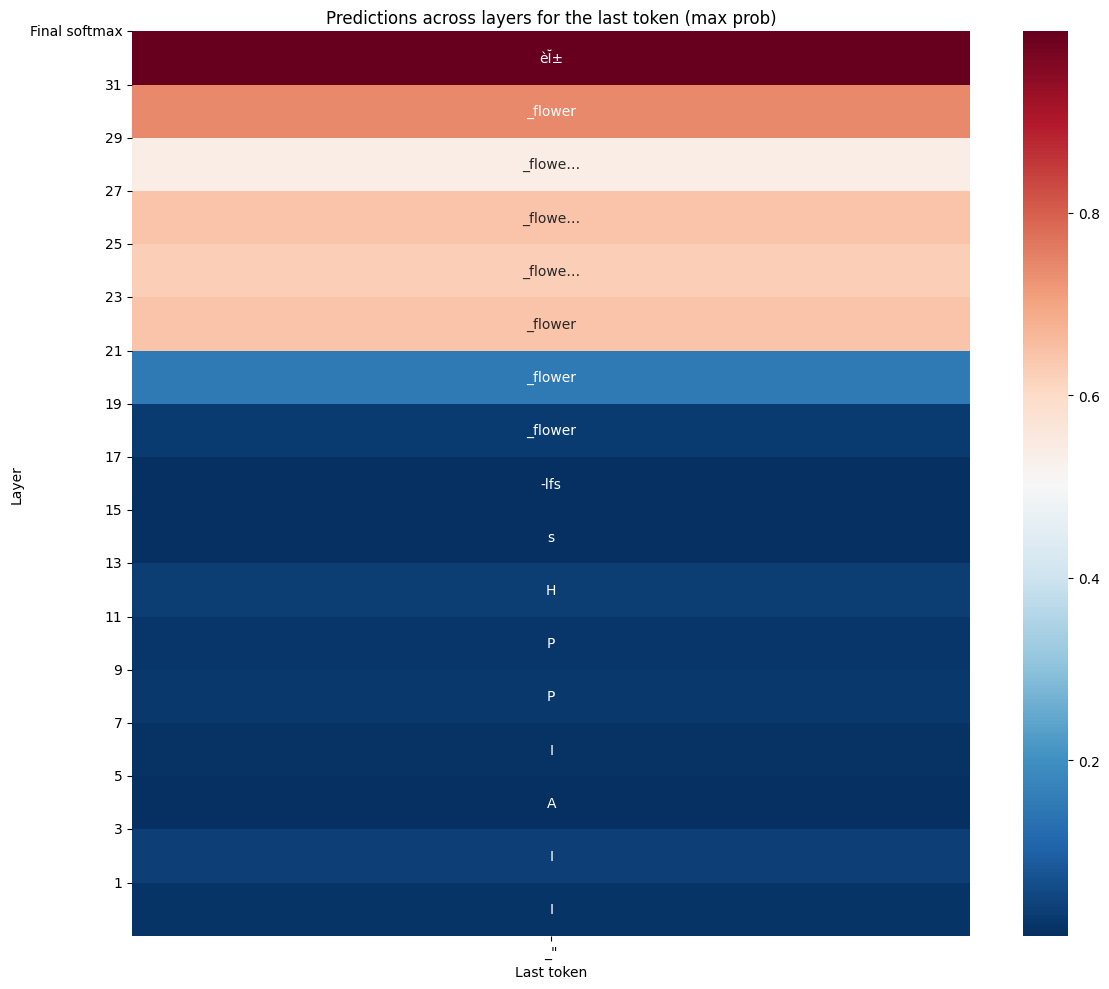

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot every 2 layers:

layers = [i+1 for i in range(32)] + ['Final softmax']
layers = layers[::-1]

selected_layers = layers[::2]
print(f"Number of selected layers: {len(selected_layers)}")

tokens = pred_traj.max_probability().sequence_labels
stats = pred_traj.max_probability().stats[::-1, :]
preds = pred_traj.max_probability().trajectory_labels.label_strings[::-1, :]

plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
ax = sns.heatmap(stats[::2, :], cmap="RdBu_r", annot=preds[::2, :], fmt="", cbar=True)

# Set labels and title
ax.set_xlabel('Last token')
ax.set_ylabel('Layer')
ax.set_title('Predictions across layers for the last token (max prob)')

# Set y-axis ticks to match the selected layers
plt.yticks(rotation=0)
ax.set_yticks(np.arange(len(selected_layers)))
ax.set_yticklabels(selected_layers)

# Set x-axis ticks
ax.set_xticks(np.arange(0.5, stats.shape[1], 1))
ax.set_xticklabels(tokens)

# Adjust layout
plt.tight_layout()
plt.show()


In [67]:
from tuned_lens.plotting import PredictionTrajectory

text_ids = torch.cat((input_ids[0], response[0][len(input_ids[0]):]))

token_range = slice(len(input_ids[0]) - 5, len(input_ids[0]))

# Create the prediction trajectory using TunedLens.
pred_traj = PredictionTrajectory.from_lens_and_model(
    lens=tuned_lens,
    model=model,
    input_ids=text_ids.tolist(),
    tokenizer=tokenizer,
    targets=text_ids[1:].tolist() + [tokenizer.eos_token_id],
).slice_sequence(token_range)


In [69]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1,  # 1 row
    cols=1,  # 1 column
    shared_yaxes=True,  # Share y-axes
    vertical_spacing=0.03,
    subplot_titles=("Max Probability"),
)

fig.add_trace(
    pred_traj.max_probability().heatmap(
        colorbar_y=12, colorbar_len=1, textfont={'size':10}
    ),
    row=1, col=1
)


fig.update_layout(
    height=900,
    width=700,
    title_text="Max probability with the Tuned Lens",
)

fig.show()


## Repetition Task

We prompt the model to simply repeat the last word instead of translating it, using the following format:

中文: "德" - 中文: "德"  
中文: "座" - 中文: "座"  
中文: "雪" - 中文: "雪"  
中文: "山" - 中文: "山"  
中文: "花" - 中文:

In [16]:
## Repetition Task

pairs = [
    {"中文": "苹果"},
    {"中文": "香蕉"},
    {"中文": "橙子"},
    {"中文": "菠萝"}
]

# The fifth pair: provide the input word without its repeated output.
fifth = {"中文": "西瓜"}

# Build the prompt:
prompt_lines = [f'中文: "{p["中文"]}" - 中文: "{p["中文"]}"' for p in pairs]
prompt_lines.append(f'中文: "{fifth["中文"]}" - 中文: "')
prompt = "\n".join(prompt_lines)

# Tokenize the prompt
encoded = tokenizer(prompt, return_tensors="pt")
input_ids = encoded.input_ids.to(device)
attention_mask = encoded.attention_mask.to(device)

# Generate a response; max_new_tokens is set to a small number to just complete the missing output
response = model.generate(
    input_ids,
    attention_mask=attention_mask,
    max_new_tokens=2,
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print the response
output = tokenizer.decode(response[0], skip_special_tokens=True)
print(output)

中文: "苹果" - 中文: "苹果"
中文: "香蕉" - 中文: "香蕉"
中文: "橙子" - 中文: "橙子"
中文: "菠萝" - 中文: "菠萝"
中文: "西瓜" - 中文: "西瓜


In [17]:
from tuned_lens.plotting import PredictionTrajectory

text_ids = torch.cat((input_ids[0], response[0][len(input_ids[0]):]))

token_range = slice(len(input_ids[0]) - 5, len(input_ids[0]))

# Create the prediction trajectory using TunedLens.
pred_traj = PredictionTrajectory.from_lens_and_model(
    lens=tuned_lens,
    model=model,
    input_ids=text_ids.tolist(),
    tokenizer=tokenizer,
    targets=text_ids[1:].tolist() + [tokenizer.eos_token_id],
).slice_sequence(token_range)


Number of selected layers: 17


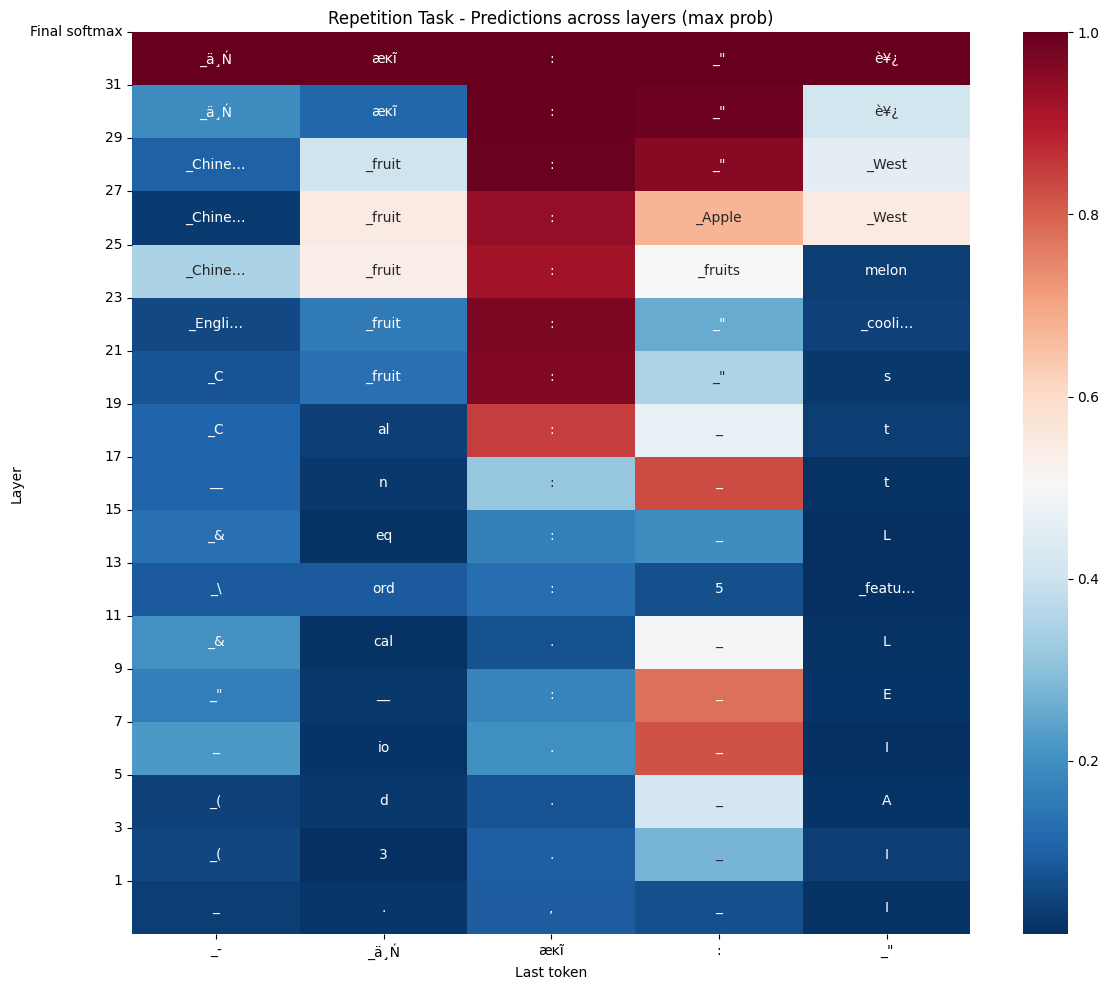

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot every 2 layers:

layers = [i+1 for i in range(32)] + ['Final softmax']
layers = layers[::-1]

selected_layers = layers[::2]
print(f"Number of selected layers: {len(selected_layers)}")

tokens = pred_traj.max_probability().sequence_labels
stats = pred_traj.max_probability().stats[::-1, :]
preds = pred_traj.max_probability().trajectory_labels.label_strings[::-1, :]

plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
ax = sns.heatmap(stats[::2, :], cmap="RdBu_r", annot=preds[::2, :], fmt="", cbar=True)

# Set labels and title
ax.set_xlabel('Last token')
ax.set_ylabel('Layer')
ax.set_title('Repetition Task - Predictions across layers (max prob)')

# Set y-axis ticks to match the selected layers
plt.yticks(rotation=0)
ax.set_yticks(np.arange(len(selected_layers)))
ax.set_yticklabels(selected_layers)

# Set x-axis ticks
ax.set_xticks(np.arange(0.5, stats.shape[1], 1))
ax.set_xticklabels(tokens)

# Adjust layout
plt.tight_layout()
plt.show()
